## <center>Case study on Supervised learning

### 1) Reading the dataset to python environment

In [1]:
import pandas as pd
iris = pd.read_excel('iris.xls')

In [2]:
# checking the overall structure of the dataset
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The dataset consist of 150 rows and 5 columns

### 2) Pre-processing 

#### 2.1) Checking for null values

In [3]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 19 null values in which 7 are in SL column,6 in SW column and 6 in PL column

#### 2.2) Filling the missing values

In [4]:
# Filling the missing values by taking the median of respective column after grouping by Classification
iris.groupby(['Classification'])[['SL','SW','PL']].median()

,SL,SW,PL
Classification,,,
Iris-setosa,5.00,3.4,1.50
Iris-versicolor,5.85,2.8,4.35
Iris-virginica,6.50,3.0,5.55


In [5]:
iris['SL'] = iris['SL'].fillna(iris.groupby('Classification')['SL'].transform('median'))
iris['SW'] = iris['SW'].fillna(iris.groupby('Classification')['SW'].transform('median'))
iris['PL'] = iris['PL'].fillna(iris.groupby('Classification')['PL'].transform('median'))

In [6]:
# Confirming that missing values are filled
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### 2.3) Checking for outliers 

<AxesSubplot:>

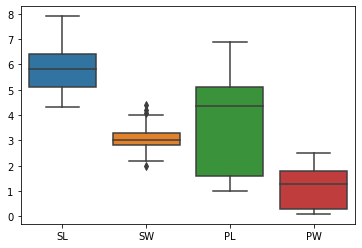

In [7]:
import seaborn as sns
sns.boxplot(data=iris)

In [8]:
print('The  minimum and maximum value in SW column are ',iris['SW'].min(),'&',iris['SW'].max(),'respectively') 

The  minimum and maximum value in SW column are  2.0 & 4.4 respectively


There are some outliers in SW column.Since the range of value for SW column is too small and  understandably outliers are part of the distribution and removing them would present a false representation of the problem.So leaving them as it is.

#### 2.4) Encoding categorical column

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We have only one categorical column,Classification which is also the target column,so encoding can be done using label encoder

But sklearn handles the text targets on its own and there is no need to encode.

###  3) Building the models

In [10]:
#Classification is the target and to know the count of each class we use value_counts()
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Classification is equally distributed.

In [11]:
# spliiting the dataset into features and target
#taking 'Classification' as target(y) and all other as X
X=iris.drop(['Classification'],axis=1)
y=iris['Classification']

In [12]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

Eventhough standard scaling is a preprocessing step,here it is done after train and test split for more convenience

In [13]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
std_slc.fit(X_train)
X_train = std_slc.transform(X_train)
X_test = std_slc.transform(X_test)

In [14]:
# checking how many data points are there in the training set
X_train.shape

(120, 4)

In [15]:
# checking how many data points are there in the training set
X_test.shape

(30, 4)

There are 120 data points for training  and 30 data points for testing

#### 3.1) Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
logit_model=LogisticRegression(random_state=42,multi_class='multinomial')
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


#### 3.2) SVM Classifier

In [28]:
from sklearn.svm import SVC
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


#### 3.3) KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 0.967
f1 score is: 0.967


#### 3.4) Decision tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),3))

Accuracy is: 1.0
f1 score is: 1.0


#### 3.5) Random forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred,average='micro'),2))

Accuracy is: 1.0
f1 score is: 1.0


#### 4) Evaluation of Model

| Model | Accuracy | F1_score
| --- | --- | --- |
| Logistic regression | 0.967 | 0.967 
| SVM | 0.967 | 0.967 
| KNN | 0.967 | 0.967  
| Random Forest |1.0 | 1.0 
| Decision tree | 1.0 | 1.0

Random forest and Decision tree algorithms gives the best result here.Random forest leverages the power of multiple decision trees and it does not rely on the feature importance given by a single decision tree.
When we have a large dataset, and interpretability is not a major concern,random forest can be chosen else Decision tree.